In [2]:
import pandas as pd
import numpy as np
import seaborn  as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [3]:
census = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Correlation Problem 

<Axes: >

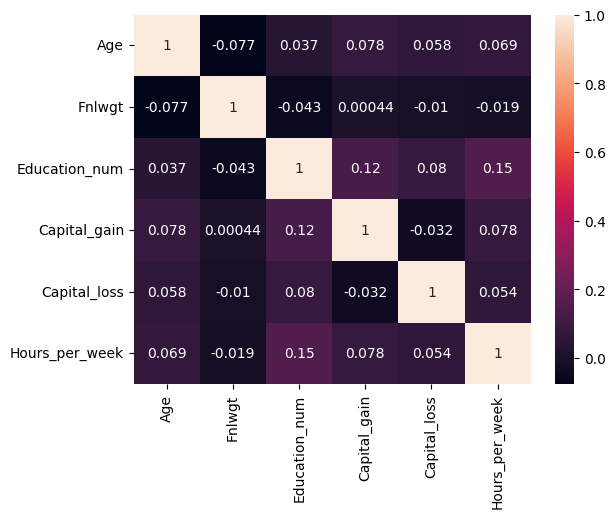

In [5]:
sns.heatmap(census.corr(), annot=True)

# the above heatmap showing only numerical column correlation as you can see there is no correlation in above features 

# # Data Analysis

In [6]:
census0 = census.copy()
le = LabelEncoder()
Income = le.fit_transform(census0['Income'])
Income

array([0, 0, 0, ..., 0, 0, 1])

# Missing Values

In [7]:
census[census['Occupation'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [8]:
census1 = census.copy()

In [9]:
census1['Workclass'] = census1['Workclass'].replace(' ?', census1['Workclass'].mode().values[0])
census1['Occupation'] = census1['Occupation'].replace(' ?', census1['Occupation'].mode().values[0])
census1['Native_country'] = census1['Native_country'].replace(' ?', census1['Native_country'].mode().values[0])

# Now Missing value problem do not exists any more in above dataset

# Data Analysis

# Age vs Salary

In [10]:
pd.crosstab(census1['Age'], census1['Income'])

Income,<=50K,>50K
Age,,
17,395,0
18,550,0
19,710,2
20,753,0
21,717,3
...,...,...
85,3,0
86,1,0
87,1,0


<Axes: xlabel='Age', ylabel='Income'>

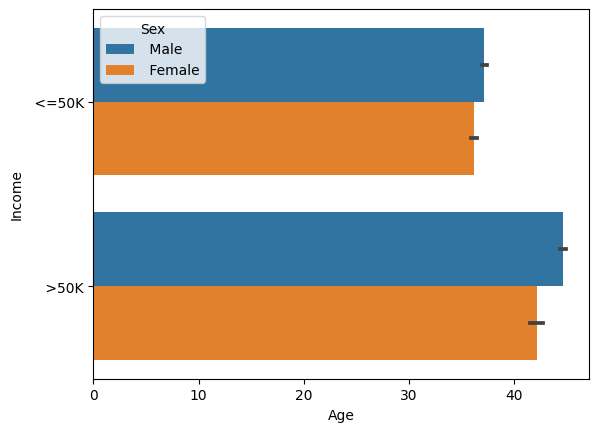

In [11]:
#pd.crosstab(census1['Age'], census1['Income']).plot()
sns.barplot(data=census1, x='Age', y='Income', hue='Sex')

# it can be seen in above chart that number of male whose income is higher than female as well as in case of income lower or equal to 50000, number of male is higher than female

# Education vs Income 

In [14]:
pd.crosstab(census1['Education'], census1['Income'])

Income,<=50K,>50K
Education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


<Axes: xlabel='Education'>

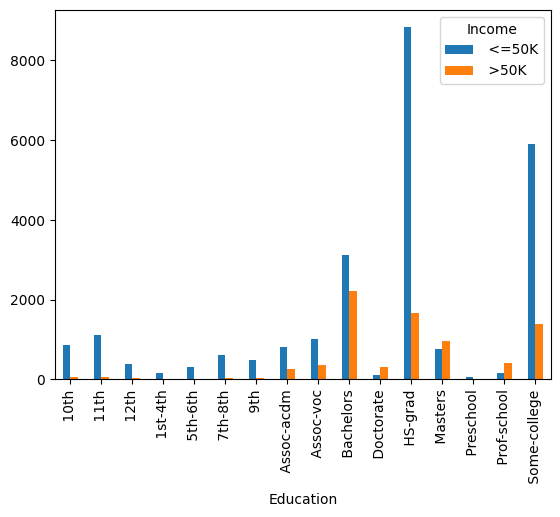

In [15]:
pd.crosstab(census1['Education'], census1['Income']).plot(kind='bar')

# person with HS-grad whose income is less than or equal 50000 is higher in comparison of other 
# lowest income of person with eduational qualification of 1st to 4th 
# only bachelors degree holder are those higher number of people earning more than 50000

# Native_country vs Income

In [16]:
pd.crosstab(census1['Native_country'], census1['Income'])

Income,<=50K,>50K
Native_country,,
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9
England,60,30


<Axes: xlabel='Native_country'>

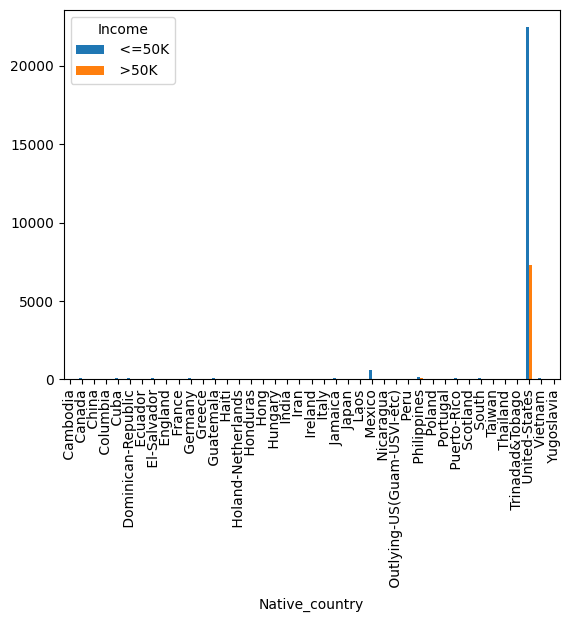

In [218]:
pd.crosstab(census1['Native_country'], census1['Income']).plot(kind='bar')

# in country of united_states, there are higher number of people whose income is less than or euqal to 50000 and more than 50000

# Race vs Income 

In [18]:
pd.crosstab(census1['Race'], census1['Income'])

Income,<=50K,>50K
Race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20698,7117


<Axes: xlabel='Race'>

<Figure size 1600x1200 with 0 Axes>

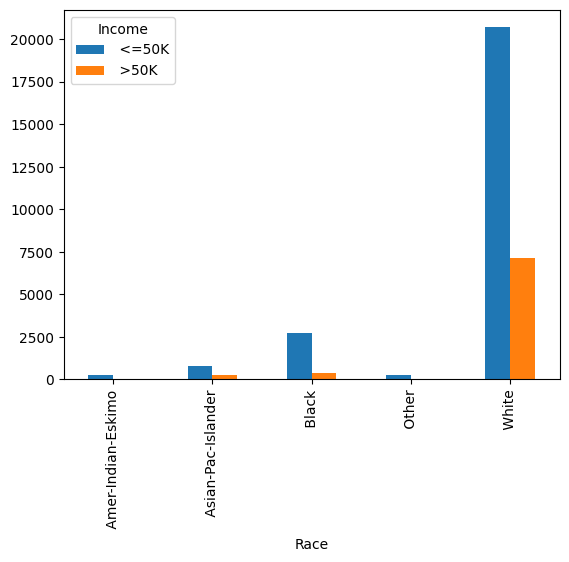

In [19]:
plt.figure(figsize=(16,12))
pd.crosstab(census1['Race'], census1['Income']).plot(kind='bar')

# there are higher number of white people getting salary <= 50000 and > 50000 as compare to other races

In [222]:
White = census1[census1['Race'] ==' White']

<Axes: >

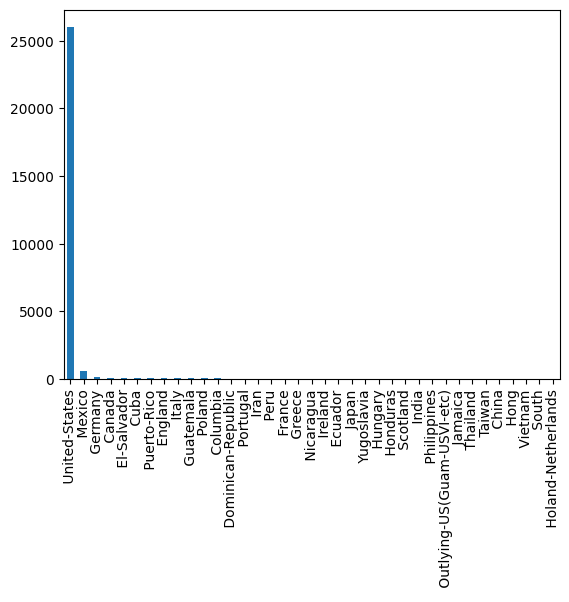

In [231]:
White['Native_country'].value_counts().plot(kind='bar')

# there are large number of white people from united state as compare to other place or region

# Occupation vs income 

In [20]:
pd.crosstab(census1['Occupation'], census1['Income'])

Income,<=50K,>50K
Occupation,,
Adm-clerical,3262,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137
Priv-house-serv,148,1


<Axes: xlabel='Occupation'>

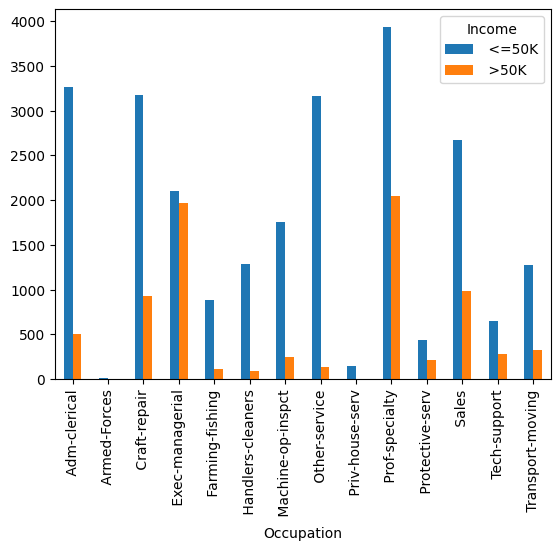

In [12]:
pd.crosstab(census1['Occupation'], census1['Income']).plot(kind='bar')

# there is higher income of exec-managerial and prof-speciality, high chance of getting salary more than 50000, but in other occupation income is lower or equal to 50000

# Hours_per_week vs income

In [23]:
pd.crosstab(census1['Hours_per_week'], census1['Income'])

Income,<=50K,>50K
Hours_per_week,,
1,18,2
2,24,8
3,38,1
4,51,3
5,53,7
...,...,...
95,1,1
96,4,1
97,1,1


<Axes: xlabel='Hours_per_week'>

<Figure size 1800x1400 with 0 Axes>

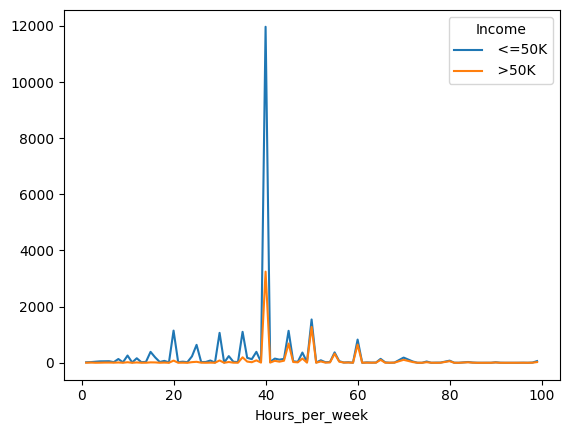

In [234]:
plt.figure(figsize=(18,14))
pd.crosstab(census1['Hours_per_week'], census1['Income']).plot(kind='line')

# as per above graph normal working hour in week is 40 hour, there is low chance of working 40 and less than 40 hours

# Sex vs Income

In [25]:
pd.crosstab(census1['Sex'], census1['Income'])

Income,<=50K,>50K
Sex,,
Female,9592,1179
Male,15127,6662


<Axes: xlabel='Sex'>

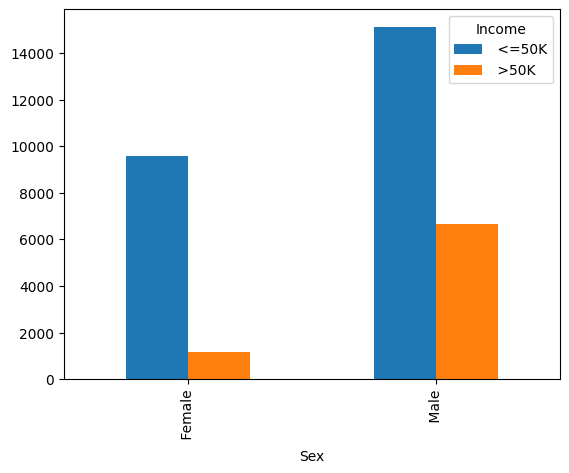

In [26]:
pd.crosstab(census1['Sex'], census1['Income']).plot(kind='bar')

# Number of male is higher whose salary is more than 50000 in compare to female whose salary is more than 50000
# number of female is higher whose salary is eual to and less than

# Outliers

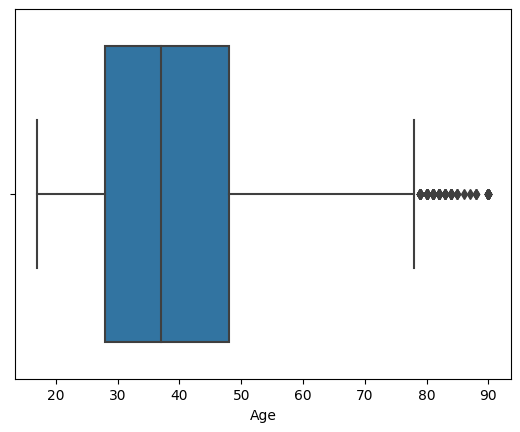

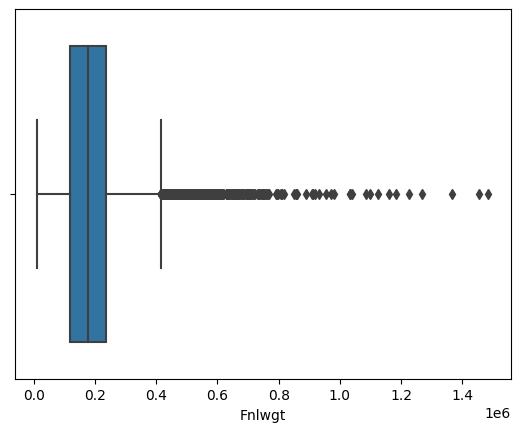

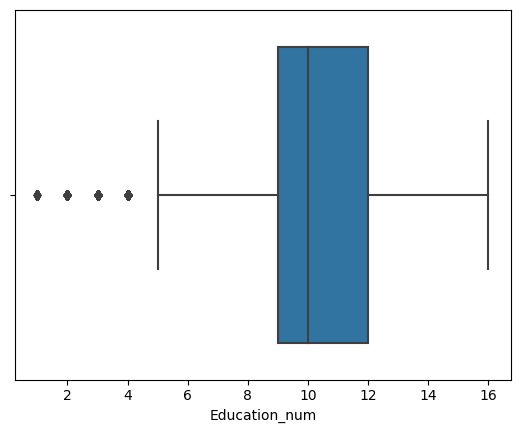

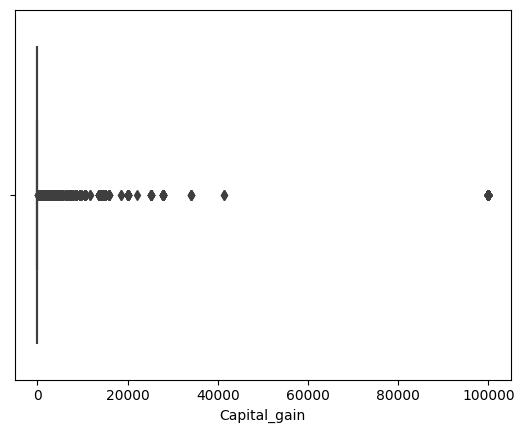

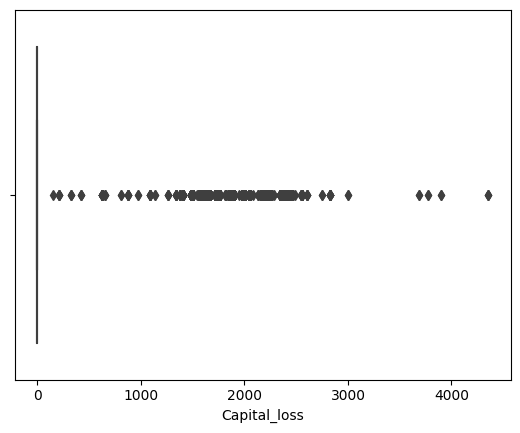

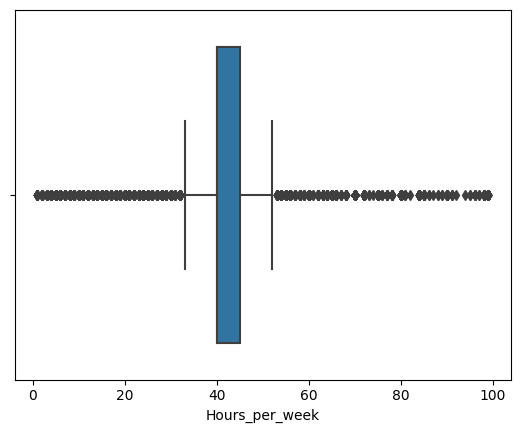

In [14]:
for i in census1.columns:
    if census1[i].dtype !='object':
        sns.boxplot(data=census1, x=i)
        plt.show()

In [15]:
for i in census1.columns:
    if census1[i].dtype !='object':
        q75 = census1[i].quantile(0.85)
        q25 = census1[i].quantile(0.15)
        iqr = q75 - q25
        print(i)
        print('upper', q75 + 1.5 *iqr)
        print('lower', q25 - 1.5 *iqr)
        

Age
upper 99.0
lower -21.0
Fnlwgt
upper 585955.3749999998
lower -204835.62499999988
Education_num
upper 19.0
lower 3.0
Capital_gain
upper 0.0
lower 0.0
Capital_loss
upper 0.0
lower 0.0
Hours_per_week
upper 80.0
lower 0.0


In [16]:
census2 = census1[census1['Age'] <= 99]
census3 = census2[census2['Fnlwgt'] <= 585955.3749999998]
census4 = census3[census3['Education_num'] <= 19.0]
census5 = census4[census4['Capital_gain'] <= 0]
census6 = census5[census5['Capital_loss'] <= 0]
census7 = census6[census6['Hours_per_week'] <= 80.0]

census8 = census7[census7['Age'] >= -21.0]
census9 = census8[census8['Fnlwgt'] >= -204835.62499999988]
census10 = census9[census9['Education_num'] >= 3.0]
census11 = census10[census10['Capital_gain'] >= 0]
census12 = census11[census11['Capital_loss'] >= 0]
census13 = census12[census12['Hours_per_week'] >= 0]

In [17]:
census13

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


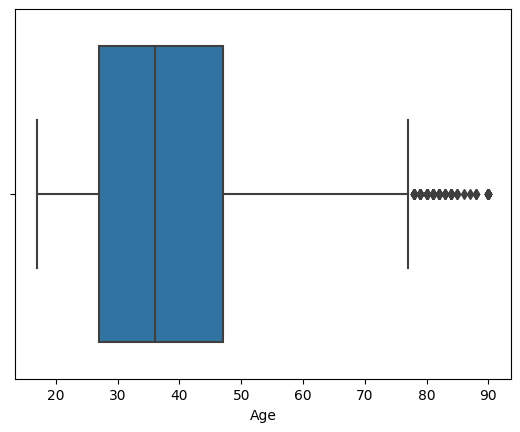

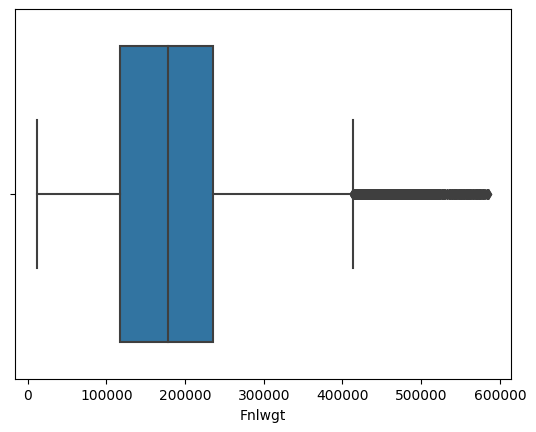

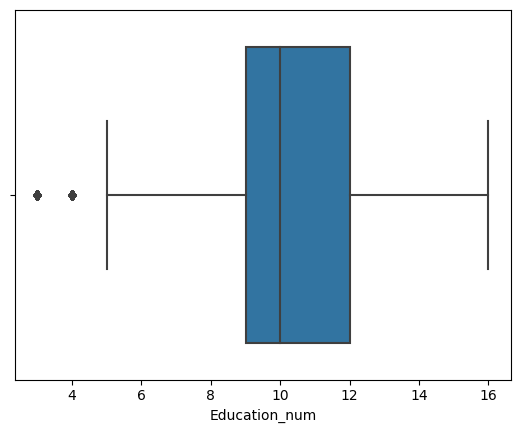

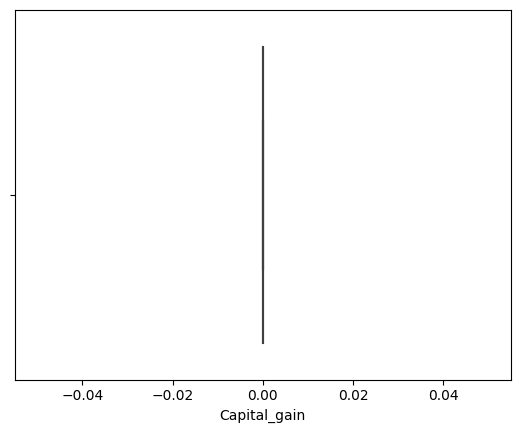

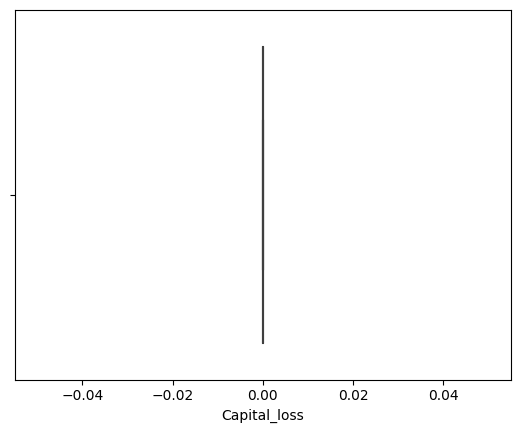

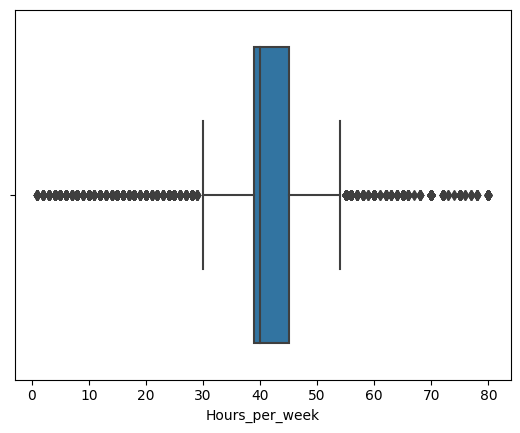

In [18]:
for i in census13.columns:
    if census13[i].dtype !='object':
        sns.boxplot(data=census13, x=i)
        plt.show()

# Loss of data 

In [19]:
27804 / 32560 *100

85.3931203931204

In [20]:
100 - 85.393

14.607

# Encoding 

# for Education ordinal encoder need to be applied 
# Naive_country and Occupation binary encoder need to be applied
# for other OnehotEncoder

In [21]:
Census = census13.drop(['Income'], axis=1)
y = census13['Income']

# Binary Encoder 

In [22]:
import category_encoders as ce


In [23]:
Census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [24]:
columns = ['Occupation', 'Native_country']

In [25]:
encoder = ce.BinaryEncoder(cols = columns)

In [26]:
Census1 = encoder.fit_transform(Census)

In [27]:
Census1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation_0,Occupation_1,Occupation_2,Occupation_3,...,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,0,0,0,1,...,Male,0,0,13,0,0,0,0,0,1
1,38,Private,215646,HS-grad,9,Divorced,0,0,1,0,...,Male,0,0,40,0,0,0,0,0,1
2,53,Private,234721,11th,7,Married-civ-spouse,0,0,1,0,...,Male,0,0,40,0,0,0,0,0,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,0,0,1,1,...,Female,0,0,40,0,0,0,0,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,0,0,0,1,...,Female,0,0,40,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,1,1,0,0,...,Male,0,0,40,0,0,0,0,0,1
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,1,0,1,1,...,Female,0,0,38,0,0,0,0,0,1
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,1,0,1,0,...,Male,0,0,40,0,0,0,0,0,1
32557,58,Private,151910,HS-grad,9,Widowed,0,1,0,1,...,Female,0,0,40,0,0,0,0,0,1


# Oridinal Encoder 

In [28]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [29]:
oh = OrdinalEncoder()

In [30]:
Census1['Education'] = oh.fit_transform(Census1[['Education']])

In [31]:
Census1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27804 entries, 0 to 32558
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               27804 non-null  int64  
 1   Workclass         27804 non-null  object 
 2   Fnlwgt            27804 non-null  int64  
 3   Education         27804 non-null  float64
 4   Education_num     27804 non-null  int64  
 5   Marital_status    27804 non-null  object 
 6   Occupation_0      27804 non-null  int64  
 7   Occupation_1      27804 non-null  int64  
 8   Occupation_2      27804 non-null  int64  
 9   Occupation_3      27804 non-null  int64  
 10  Relationship      27804 non-null  object 
 11  Race              27804 non-null  object 
 12  Sex               27804 non-null  object 
 13  Capital_gain      27804 non-null  int64  
 14  Capital_loss      27804 non-null  int64  
 15  Hours_per_week    27804 non-null  int64  
 16  Native_country_0  27804 non-null  int64 

In [32]:
Census2 = Census1.drop(['Workclass','Marital_status','Relationship','Race','Sex'], axis=1)

In [33]:
Census2

,Age,Fnlwgt,Education,Education_num,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Capital_gain,Capital_loss,Hours_per_week,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,50,83311,8.0,13,0,0,0,1,0,0,13,0,0,0,0,0,1
1,38,215646,10.0,9,0,0,1,0,0,0,40,0,0,0,0,0,1
2,53,234721,1.0,7,0,0,1,0,0,0,40,0,0,0,0,0,1
3,28,338409,8.0,13,0,0,1,1,0,0,40,0,0,0,0,1,0
4,37,284582,11.0,14,0,0,0,1,0,0,40,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,310152,13.0,10,1,1,0,0,0,0,40,0,0,0,0,0,1
32555,27,257302,6.0,12,1,0,1,1,0,0,38,0,0,0,0,0,1
32556,40,154374,10.0,9,1,0,1,0,0,0,40,0,0,0,0,0,1
32557,58,151910,10.0,9,0,1,0,1,0,0,40,0,0,0,0,0,1


# One Hot Encoder

In [34]:
cate = [i for i in Census1.columns if Census1[i].dtype =='object']

categorical = Census[cate]

In [35]:
categorical

,Workclass,Marital_status,Relationship,Race,Sex
0,Self-emp-not-inc,Married-civ-spouse,Husband,White,Male
1,Private,Divorced,Not-in-family,White,Male
2,Private,Married-civ-spouse,Husband,Black,Male
3,Private,Married-civ-spouse,Wife,Black,Female
4,Private,Married-civ-spouse,Wife,White,Female
...,...,...,...,...,...
32554,Private,Never-married,Not-in-family,White,Male
32555,Private,Married-civ-spouse,Wife,White,Female
32556,Private,Married-civ-spouse,Husband,White,Male
32557,Private,Widowed,Unmarried,White,Female


In [36]:
categorical['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [37]:
ohe = OneHotEncoder(drop='first', sparse=True)

In [38]:
Encoded = pd.DataFrame(ohe.fit_transform(categorical).toarray())

In [39]:
Encoded1 = Encoded.reset_index()

In [40]:
Census3 = Census2.reset_index()

In [41]:
Merged = pd.merge(Census3, Encoded1, left_index=True, right_index=True)

In [42]:
Merged

,index_x,Age,Fnlwgt,Education,Education_num,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Capital_gain,...,13,14,15,16,17,18,19,20,21,22
0,0,50,83311,8.0,13,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,38,215646,10.0,9,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,53,234721,1.0,7,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,28,338409,8.0,13,0,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4,37,284582,11.0,14,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27799,32554,22,310152,13.0,10,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
27800,32555,27,257302,6.0,12,1,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27801,32556,40,154374,10.0,9,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
27802,32557,58,151910,10.0,9,0,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Whether skewness Still Exist in data or not 

In [43]:
Merged.skew()

index_x              0.003270
Age                  0.596794
Fnlwgt               0.772465
Education           -1.067266
Education_num       -0.176055
Occupation_0         1.536178
Occupation_1         0.021006
Occupation_2        -0.221176
Occupation_3        -0.396757
Capital_gain         0.000000
Capital_loss         0.000000
Hours_per_week      -0.248836
Native_country_0    11.941230
Native_country_1     6.319460
Native_country_2     5.394862
Native_country_3     4.058605
Native_country_4     4.987162
Native_country_5    -5.551355
index_y              0.000000
0                    3.599523
1                   63.003401
2                   -1.242526
3                    5.599939
4                    3.254425
5                    4.669382
6                   48.106654
7                   37.247153
8                    0.284093
9                    8.592310
10                   0.623773
11                   5.211600
12                   5.436379
13                   1.082908
14        

# Label Encoder

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [46]:
target = pd.DataFrame(le.fit_transform(y))

In [47]:
target.value_counts()

0    22492
1     5312
dtype: int64

# Transforming  through PowerEncoder

In [48]:
from sklearn.preprocessing import PowerTransformer

In [49]:
pt = PowerTransformer()

In [50]:
transformed = pd.DataFrame(pt.fit_transform(Merged))

In [51]:
transformed.skew()

0     -0.290112
1     -0.008118
2     -0.022330
3     -0.399196
4      0.027999
5      1.536178
6      0.021006
7     -0.221176
8     -0.396757
9      0.000000
10     0.000000
11     0.135718
12    11.941230
13     6.319460
14     5.394862
15     4.058605
16     4.987162
17    -5.551355
18    -0.291390
19     3.599523
20    63.003401
21    -1.242526
22     5.599939
23     3.254425
24     4.669382
25    48.106654
26    37.247153
27     0.284093
28     8.592310
29     0.623773
30     5.211600
31     5.436379
32     1.082908
33     5.330804
34     1.748566
35     2.460790
36     4.376209
37     5.340785
38     2.681811
39    10.739454
40    -1.969058
41    -0.644036
dtype: float64

# Principal Components Analysis

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA()

In [54]:
Selected = pd.DataFrame(pca.fit_transform(transformed))

In [55]:
Selected.shape

(27804, 42)

# Imbalance Dataset Problem

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smote =SMOTE()

In [58]:
x_sample, y_sample = smote.fit_resample(Selected, target)

In [59]:
y_sample.value_counts()

0    22492
1    22492
dtype: int64

In [60]:
x_sample.shape

(44984, 42)

# StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
st = StandardScaler()

In [63]:
x_scaled = pd.DataFrame(st.fit_transform(x_sample))

# Feature Selection

# PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=40)

In [66]:
selected = pd.DataFrame(pca.fit_transform(x_scaled))

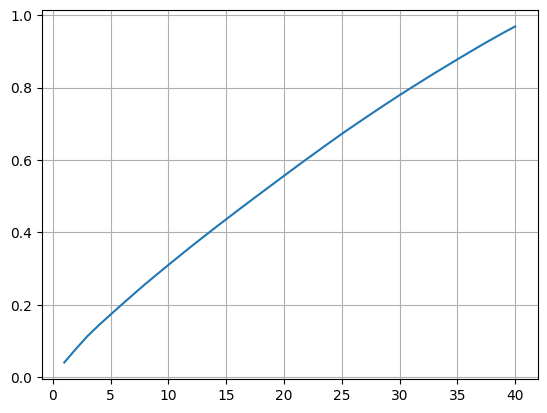

In [67]:
explained_variances = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(explained_variances)
sns.lineplot(x=np.arange(1, len(cumulative_sum)+1), y=cumulative_sum)
plt.grid(True)

# Train Test SPlit

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train,y_test = train_test_split(selected, y_sample, test_size = 0.25, random_state=80, stratify = y_sample)

In [70]:
y_test.value_counts()

0    5623
1    5623
dtype: int64

In [71]:
y_train.value_counts()

0    16869
1    16869
dtype: int64

# Model Building 

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report

In [73]:
models = {
    'Logistic': LogisticRegression(), 
    'KNeighbors': KNeighborsClassifier(), 
    'RandomForest': RandomForestClassifier(), 
    'AdaBoost': AdaBoostClassifier(), 
    'GradientBoosting': GradientBoostingClassifier(), 
    'XGBClassifier': XGBClassifier(), 
    'DecisionTree': DecisionTreeClassifier()}

In [74]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print('.........................')
    print(model_name)
    print('accuracy_score_train', accuracy_score(y_pred_train, y_train))
    print('accuracy_score_test', accuracy_score(y_pred_test, y_test))
    print('...................................................')
    print('roc_auc_score_train', roc_auc_score(y_pred_train, y_train))
    print('roc_auc_score_test', roc_auc_score(y_pred_test, y_test))
    print('......................................................')
    print('precision_score_train', precision_score(y_pred_train, y_train))
    print('precision_score_test', precision_score(y_pred_test, y_test))
    print('........................................................')
    print('recall_score_train', recall_score(y_pred_train, y_train))
    print('recall_score_test', recall_score(y_pred_test, y_test))
    print('.....................................................')
    print('f1_score_train', f1_score(y_pred_train, y_train))
    print('f1_score_test', f1_score(y_pred_test, y_test))
    print('..............................................')
    print('Confusion_Matrix on traning')
    print(confusion_matrix(y_pred_train, y_train))
    print('Confusion_Matrix on test')
    print(confusion_matrix(y_pred_test, y_test))
   

.........................
Logistic
accuracy_score_train 0.814304345248681
accuracy_score_test 0.8165569980437489
...................................................
roc_auc_score_train 0.8176647321482735
roc_auc_score_test 0.819581262699991
......................................................
precision_score_train 0.8657300373466121
precision_score_test 0.8651965143162014
........................................................
recall_score_train 0.7849924747366158
recall_score_test 0.7884927066450568
.....................................................
f1_score_train 0.8233868012291039
f1_score_test 0.8250657169507335
..............................................
Confusion_Matrix on traning
[[12869  2265]
 [ 4000 14604]]
Confusion_Matrix on test
[[4318  758]
 [1305 4865]]
.........................
KNeighbors
accuracy_score_train 0.8929397118975636
accuracy_score_test 0.8554152587586697
...................................................
roc_auc_score_train 0.9049403859476378
roc_a

In [75]:
for model_name, model in models.items():
    score =cross_val_score(model, x_train, y_train)
    
    print(model_name,'score is', np.mean(score))
    print('.................................')
    

Logistic score is 0.8138003331345139
.................................
KNeighbors score is 0.8428475884559639
.................................
RandomForest score is 0.8866262016910806
.................................
AdaBoost score is 0.8112511310434224
.................................
GradientBoosting score is 0.8250932795088888
.................................
XGBClassifier score is 0.8669452071126212
.................................
DecisionTree score is 0.8226331464009252
.................................


# # Best Model 

# KNeighborsClassifier

In [76]:
gd = KNeighborsClassifier()

In [77]:
gd.fit(x_train, y_train)

KNeighborsClassifier()

In [78]:
y_pre_train11 = gd.predict(x_train)

In [79]:
y_pre_test11 = gd.predict(x_test)

# Accuracy Check

In [80]:
accuracy_score(y_pre_train11, y_train)

0.8929397118975636

In [81]:
accuracy_score(y_pre_test11, y_test)

0.8554152587586697

# Roc_Auc

In [82]:
roc_auc_score(y_pre_train11, y_train)
   

0.9049403859476378

In [83]:
roc_auc_score(y_pre_test11, y_test)

0.8714992372202279

# Confusion Matrix

In [103]:
confusion_matrix(y_pre_train11, y_train)

array([[13611,   354],
       [ 3258, 16515]], dtype=int64)

In [104]:
confusion_matrix(y_pre_test11, y_test)

array([[4225,  228],
       [1398, 5395]], dtype=int64)

# Classification_report

In [105]:
print(classification_report(y_pre_train11, y_train))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     13965
           1       0.98      0.84      0.90     19773

    accuracy                           0.89     33738
   macro avg       0.89      0.90      0.89     33738
weighted avg       0.91      0.89      0.89     33738



In [106]:
print(classification_report(y_pre_test11, y_test))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      4453
           1       0.96      0.79      0.87      6793

    accuracy                           0.86     11246
   macro avg       0.86      0.87      0.85     11246
weighted avg       0.88      0.86      0.86     11246



# Cross_Validation score

In [84]:
score =cross_val_score(gd, x_train, y_train)
score.mean()

0.8428475884559639

# Hyperparameter Tuning

In [85]:
param_grid = {
    'n_neighbors': [5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20],
    'p': [1, 2],  
    'metric': ['euclidean', 'manhattan']  
}

In [86]:
rfcv = RandomizedSearchCV(param_distributions = param_grid, estimator=gd, cv=2)

In [108]:
rfcv.fit(selected, y_sample)

RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20],
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [5, 7, 9], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [109]:
rfcv.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 5,
 'metric': 'manhattan',
 'leaf_size': 20,
 'algorithm': 'ball_tree'}

# After applying the RandomizedSearchCV

In [88]:
gd1 = KNeighborsClassifier(weights='distance', p=2, n_neighbors=5, metric ='manhattan', leaf_size=20, algorithm = 'ball_tree')

In [89]:
gd1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                     weights='distance')

In [90]:
y_pre_train12 = gd1.predict(x_train)

In [91]:
y_pre_test12 = gd.predict(x_test)

# Accuracy Score

In [92]:
accuracy_score(y_pre_train12, y_train)

1.0

In [93]:
accuracy_score(y_pre_test12, y_test)

0.8554152587586697

# ROC AUC

In [94]:
print('roc_auc_score_train', roc_auc_score(y_pre_train12, y_train))
    

roc_auc_score_train 1.0


In [95]:
print('roc_auc_score_test', roc_auc_score(y_pre_test12, y_test))

roc_auc_score_test 0.8714992372202279


# Confusion Matrix

In [96]:
print('Confusion_Matrix on traning')
print(confusion_matrix(y_pre_train12, y_train))

Confusion_Matrix on traning
[[16869     0]
 [    0 16869]]


In [97]:
print('Confusion_Matrix on test')
print(confusion_matrix(y_pre_test12, y_test))

Confusion_Matrix on test
[[4225  228]
 [1398 5395]]


# classification_report

In [101]:
print(classification_report(y_pre_train12, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16869
           1       1.00      1.00      1.00     16869

    accuracy                           1.00     33738
   macro avg       1.00      1.00      1.00     33738
weighted avg       1.00      1.00      1.00     33738



In [102]:
print(classification_report(y_pre_test12, y_test))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      4453
           1       0.96      0.79      0.87      6793

    accuracy                           0.86     11246
   macro avg       0.86      0.87      0.85     11246
weighted avg       0.88      0.86      0.86     11246



# Cross Validation score

In [107]:
score =cross_val_score(gd1, x_train, y_train)
score.mean()

0.8599203413332883